In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np


from sklearn.preprocessing import LabelEncoder, StandardScaler  # To encode categorical labels and scale features
import tensorflow as tf  # For building and training deep learning models

from tensorflow.keras import layers  # To define layers for a neural network model

import matplotlib.pyplot as plt  # For data visualization and plotting
import numpy as np  # For numerical operations and handling arrays
# New Section

In [5]:
# Try yo commit

In [6]:
file_path = 'Harat D complete Dataset.csv'
dataset = pd.read_csv(file_path)
dataset.head()

,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,Cholesterol level (mg/dL),LDL level (mg/dL),...,Fever,Chills,Alcoholism,Hypertension,Fainting,Dizziness,Smoking,Obesity,Murmur,Heart disease name
0,56,Yes,Yes,No,150,102,78,Wheeze,268,112,...,Yes,No,No,Yes,No,No,Never,Yes,No,Coronary Artery Disease (CAD)
1,41,Yes,No,Yes,133,101,71,Rhonchi,160,125,...,No,No,Yes,No,No,No,Former,No,No,Cardiomyopathy
2,70,Yes,Yes,Yes,106,69,99,Wheeze,287,136,...,Yes,No,Yes,No,No,No,Current,No,Yes,Cardiomyopathy
3,61,Yes,Yes,No,157,109,64,Wheeze,275,96,...,No,Yes,Yes,Yes,No,No,Never,No,Yes,Arrhythmia
4,51,Yes,No,Yes,91,110,73,Crackle,163,99,...,Yes,No,No,No,Yes,Yes,Current,No,Yes,Valvular Heart Disease


In [7]:
label_encoders = {}
for column in dataset.columns:
    if dataset[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        dataset[column] = label_encoders[column].fit_transform(dataset[column])


In [8]:

X = dataset.drop('Heart disease name', axis=1)
y = dataset['Heart disease name']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create Neurons

In [11]:
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(np.unique(y)), activation='softmax')
])

c:\Users\progr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# The `model` is a sequential neural network with three ReLU-activated dense layers (128, 64, and 32 neurons) and a final softmax layer with the number of neurons equal to the unique classes in `y`, designed for multi-class classification.

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,469 (56.52 KB)

 Trainable params: 14,469 (56.52 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.compile)

<bound method Trainer.compile of <Sequential name=sequential, built=True>>


# Adam (short for Adaptive Moment Estimation) is an optimization algorithm used in training machine learning models.

## The `model.compile` function configures the model for training by specifying the Adam optimizer, sparse categorical crossentropy loss function, and accuracy as the evaluation metric.

In [14]:
print(model.optimizer)
print(model.loss)
print(model.metrics)


sparse_categorical_crossentropy
[<Mean name=loss>, <CompileMetrics name=compile_metrics>]


In [15]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3604 - loss: 1.5002 - val_accuracy: 0.5600 - val_loss: 1.1888
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6747 - loss: 1.0507 - val_accuracy: 0.7200 - val_loss: 0.7553
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8220 - loss: 0.6027 - val_accuracy: 0.7900 - val_loss: 0.4925
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8671 - loss: 0.3669 - val_accuracy: 0.8050 - val_loss: 0.3797
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8602 - loss: 0.2925 - val_accuracy: 0.7850 - val_loss: 0.3432
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8587 - loss: 0.2632 - val_accuracy: 0.7900 - val_loss: 0.3390
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9250 - loss: 0.2158 - val_accuracy: 0.7750 - val_loss: 0.3453
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9176 - loss: 0.2098 - val_accuracy: 0.7750 - val_loss

#ms/step stands for milliseconds per step. It measures the average time taken to process one batch of data during training or evaluation in the neural network model.

#line shows the model's performance metrics (accuracy and loss) on both the training and validation datasets after completing that epoch.

In [16]:
print(history)

In [17]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7818 - loss: 0.9153 
Test Accuracy: 78.50%


# Accuracy Score

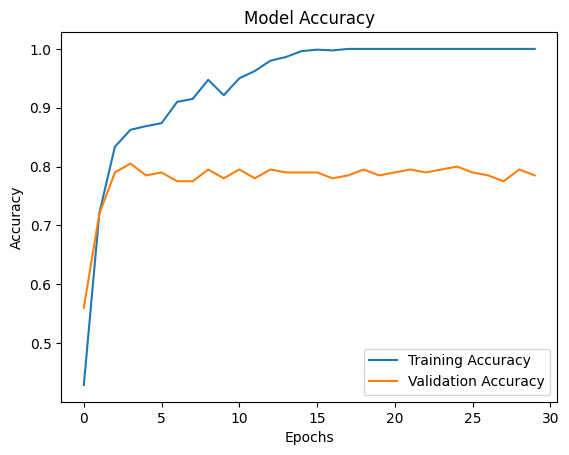

In [18]:

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

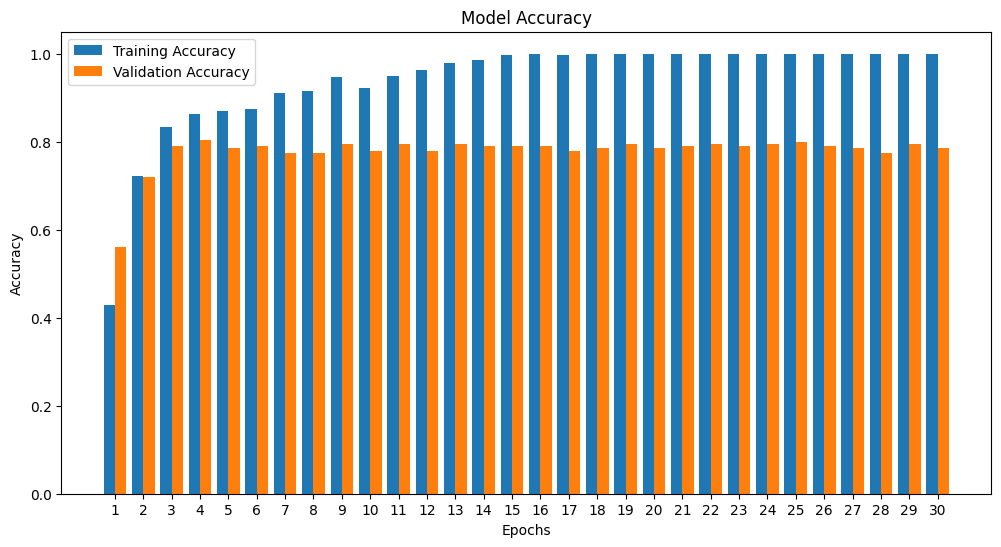

In [19]:
import matplotlib.pyplot as plt

#accuracy and validation accuracy from history
epochs = range(1, len(history.history['accuracy']) + 1)
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


plt.figure(figsize=(12, 6))


plt.bar(epochs, train_accuracy, width=0.4, label='Training Accuracy', align='center')

plt.bar([epoch + 0.4 for epoch in epochs], val_accuracy, width=0.4, label='Validation Accuracy', align='center')

plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks([epoch + 0.2 for epoch in epochs], epochs)
plt.legend()
plt.show()


In [20]:
print("Chest pain possible values:", label_encoders['Chest pain'].classes_)


Chest pain possible values: ['No' 'Yes']


In [21]:
import pandas as pd
import numpy as np

def get_user_input():
    user_data = {}
    for column in X.columns:
        if column in label_encoders:
            # Normalize user input to match the case of encoding classes
            user_value = input(f"Enter {column} (possible values: {label_encoders[column].classes_.tolist()}): ").strip().capitalize()
            if user_value not in label_encoders[column].classes_:
                print(f"Warning: '{user_value}' is not a recognized value for {column}. Please use one of {label_encoders[column].classes_}.")
                return None
            user_data[column] = label_encoders[column].transform([user_value])[0]
        else:
            try:
                user_data[column] = float(input(f"Enter {column}: "))
            except ValueError:
                print(f"Invalid input for {column}. Please enter a numerical value.")
                return None
    return pd.DataFrame([user_data])



In [22]:
import matplotlib.pyplot as plt
import numpy as np


user_input = get_user_input()

if user_input is not None:

    user_input_scaled = scaler.transform(user_input)


    prediction = model.predict(user_input_scaled)


    confidence_scores = prediction[0]


    predicted_class = np.argmax(confidence_scores)
    predicted_disease = label_encoders['Heart disease name'].inverse_transform([predicted_class])


    print(f"Predicted Heart Disease: {predicted_disease[0]}")

    # Visualization
    plt.figure(figsize=(14, 8))


    percentages = confidence_scores * 100


    plt.bar(range(len(confidence_scores)), percentages, tick_label=label_encoders['Heart disease name'].classes_)
    plt.title(f'Prediction Confidence Scores for {predicted_disease[0]}')
    plt.xlabel('Classes')
    plt.ylabel('Confidence (%)')
    plt.show()

else:
    print("Invalid input. Please try again.")


Invalid input for Age. Please enter a numerical value.
Invalid input. Please try again.
